# LAB 6 - Syracuse Real Estate Investment Trust

## Research Question: Can we predict which three zip codes provide the best investment opportunity for the #Syracuse Real Estate Investment Trust (SREIT)?

### We begin the investigation by importing the appropriate tools for analysis:

In [1]:
#!pip install prophet

     |████████████████████████████████| 6.8 MB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 73 kB 6.4 MB/s  eta 0:00:01
     |████████████████████████████████| 18.1 MB 10.6 MB/s eta 0:00:01
  Using cached wheel-0.37.1-py2.py3-none-any.whl (35 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2
  Attempting uninstall: wheel
    Found existing installation: wheel 0.36.2
    Uninstalling wheel-0.36.2:
      Successfully uninstalled wheel-0.36.2
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [4]:
# import libraries for analysis
import numpy as np
import pandas as pd
from math import sqrt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
%matplotlib inline
from prophet import Prophet
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Next, we import the dataframe we'll use to facilitate our research - Zillow data

In [9]:
# read in the zillow dataset
df = pd.read_csv("Zip_Zhvi_SingleFamilyResidence_20.txt")
  
# store dataframe into a csv file
df.to_csv('Zip_Zhvi_SingleFamilyResidence_20.csv', 
                  index = None)

# convert csv into a pandas dataframe
sfrdf = pd.read_csv('Zip_Zhvi_SingleFamilyResidence_20.csv')

sfrdf.head(10)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/2000,...,6/30/2019,7/31/2019,8/31/2019,9/30/2019,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020,3/31/2020
0,77207,10323,44502,Zip,OH,OH,Youngstown,Youngstown-Warren-Boardman,Mahoning County,11209.0,...,17888,18406,18862,19176,19554,19888,20313,20572,20821,21178
1,89222,30742,71839,Zip,AR,AR,Garland,Texarkana,Miller County,15746.0,...,21021,21120,21245,21538,21666,21700,21598,21590,21514,21485
2,63200,31386,13639,Zip,NY,NY,Town Of Fine,Ogdensburg-Massena,Saint Lawrence County,23529.0,...,42283,42336,42611,42798,42994,43057,43471,43832,44111,44222
3,76354,21359,42410,Zip,KY,KY,Earlington,Madisonville,Hopkins County,14205.0,...,27760,27800,27865,27972,28047,28113,28078,28008,27840,27657
4,76033,13724,41522,Zip,KY,KY,Elkhorn City,NaN,Pike County,18425.0,...,38467,38623,38703,38648,38624,38748,38927,39053,38893,38750
5,76054,19949,41557,Zip,KY,KY,Raccoon,NaN,Pike County,16047.0,...,45130,45544,45931,45995,46051,46287,46426,46460,46228,46081
6,90078,15054,73554,Zip,OK,OK,Mangum,NaN,Greer County,19281.0,...,44475,45087,45695,46018,46210,46606,47188,47744,48059,48189
7,68784,32559,25849,Zip,WV,WV,Lester,Beckley,Raleigh County,16883.0,...,25924,26087,26189,26417,26761,27150,27570,27644,27825,27888
8,86365,8798,64128,Zip,MO,MO,Kansas City,Kansas City,Jackson County,19216.0,...,38118,37908,37634,37342,37081,36908,36772,36794,37051,37312
9,76043,19869,41539,Zip,KY,KY,Kimper,NaN,Pike County,18827.0,...,42661,42810,42930,43014,43054,43149,43214,43268,43322,43378


## Initial Data Analysis - Develop time series plots for the following Arkansas metro areas:

In [13]:
# create individual variables separating out the following individual metro areas
hotsprings = sfrdf[sfrdf['Metro'].str.contains('Hot Springs', na=False)]
lilrock = sfrdf[sfrdf['Metro'].str.contains('Little Rock', na=False)]
fayetteville = sfrdf[sfrdf['Metro'].str.contains('Fayetteville', na=False)]
searcy = sfrdf[sfrdf['Metro'].str.contains('Searcy', na=False)]

### Plots

In [23]:
# create a function that intakes a dataframe with a metro area and outputs a graph of home prices
# function adapted from daniel caraway
def metro_price_graph(df, metro_area):
  df_t = df.loc[:, '1/31/2000'::].T
  df_t['avg'] = df_t.mean(numeric_only=True, axis=1)
  df_t.reset_index(inplace=True)
  columns = ['index', 'avg']
  df = pd.DataFrame(df_t, columns = columns)
  df = df.rename(index=str, columns={"avg": "y", "index": "ds"})
  ax = df.set_index('ds').plot(figsize=(10, 6))
  ax.set_ylabel('Single Family Residence in ' + metro_area)
  ax.set_xlabel('Date')
  plt.show()

### Plot

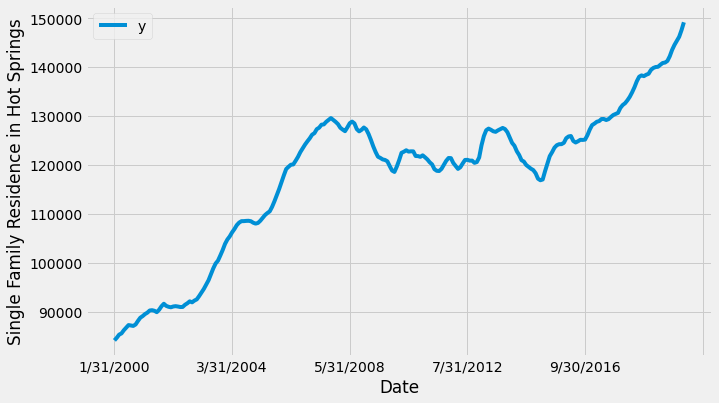

In [24]:
metro_price_graph(hotsprings, "Hot Springs")